# 燃費を予測

### ≪機械学習の流れ≫
１.データ収集<br>
２.ダミー変数化（カテゴリ特徴量列）<br>
３.テストデータの分離<br>
４.前処理<br>　
 ①欠損値処理<br>　
 ②外れ値の処理<br>　
 ③特徴量の絞り込み<br>　
 ④標準化<br>　
 ⑤多項式特徴量、交互作用特徴量の追加<br>　
 ⑥特徴量と正解データに分割<br>　
 ⑦教師データの分割<br>
５.学習<br>　
 ①未学習状態のモデルの生成<br>　
 ②訓練データで学習<br>
６.評価<br>　
 ①検証データで評価し指標確認<br>　　
⇒OK:最終性能評価（テストデータで評価）<br>　　
⇒NG:改善案検討、前処理に戻る<br>

準備：matplotlib日本語化のためのライブラリのインストール

In [49]:
!pip install japanize-matplotlib

準備：使用する各種ライブラリをインポートしてします。<br>
また、グラフ表示が同一タブ上に表示されるようにします。

In [50]:
import japanize_matplotlib

# pandasをインポートし、別名 pd とする
import pandas as pd

# treeモジュールのインポート
from sklearn import tree

# グラフ描画を当タブに表示
%matplotlib inline

### ≪機械学習の流れ≫　１.データ収集

事前に準備しているCSVファイルを読み込み、pandasを利用してデータフレームを作成します。<br>
読み込み後にデータフレームの先頭5行を表示します。

In [51]:
# house_rent.csv を読み込みデータフレームを生成
df = pd.read_csv('auto_mgp.csv', encoding='cp932')

# 先頭の５行を表示
df.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


### ≪機械学習の流れ≫　２.ダミー変数化（カテゴリ特徴量列）

scikit-learnでは、特徴量には数値の列しか追加できません。<br>
そのため、文字列である列を特徴量に加えたいときには、文字列を数値に変換します。<br>

※「今回はカテゴリ特徴量列（文字の列）が存在しない」ため実施しないと思いましたが。。。  
進んでいくうちに、「Orign」が数値に意味がないのではないか！？と気付きましたので、ここまで戻り以下を追加しました。

In [52]:
# 特徴量のみダミー変数化
df2 = pd.get_dummies(df, drop_first=True, columns=['Origin'])

### ≪機械学習の流れ≫　３.テストデータの分離

訓練データ（訓練・検証）とテストデータに分割します。<br>
<br>　
訓練データ：学習に利用するデータ<br>　
検証データ：学習には利用せず、チューニングの参考にするために利用するデータ<br>　
テストデータ：最終的なモデルの予測性能を評価するためだけのデータ

In [53]:
# データの分割で使用する関数をインポート
from sklearn.model_selection import train_test_split

# 訓練（訓練・検証）データとテストデータに分割します。　割合 8:2
train_vol, test_vol = train_test_split(df2, test_size=0.2, random_state=0)

### ≪機械学習の流れ≫　４.前処理　①欠損値処理

欠損値（空欄のデータ）を確認します。<br>
今回は３パータンで確認しています。

In [54]:
# データフレーム全体で欠損値が存在するか確認
train_vol.isnull()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_2,Origin_3
64,False,False,False,False,False,False,False,False,False,False
55,False,False,False,False,False,False,False,False,False,False
317,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False
358,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False
47,False,False,False,False,False,False,False,False,False,False


In [55]:
# 列単位で欠損値が存在するか確認
train_vol.isnull().any(axis=0)

Unnamed: 0      False
MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin_2        False
Origin_3        False
dtype: bool

In [56]:
# train_vol(訓練データ)の欠損値を確認
train_vol.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
Origin_2        0
Origin_3        0
dtype: int64

In [57]:
# 列単位で欠損値の数を確認
train_vol.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
Origin_2        0
Origin_3        0
dtype: int64

Horsepower（馬力）に"５つ"の欠損値があることが分かりました。<br>
穴埋めは「数値の場合は平均値や中央値」、「文字列の場合は最頻値」を入れます。<br>

今回は、数値のため平均値での穴埋めを行います。<br>

In [58]:
# 欠損値を平均値で穴埋め
train_vol2 = train_vol.fillna(train_vol.mean())

# 穴埋め後に列単位で欠損値の数を確認
train_vol2.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin_2        0
Origin_3        0
dtype: int64

欠損値を補完できたことを確認できました。

### ≪機械学習の流れ≫　４.前処理 ②外れ値の処理　

教師あり学習のモデルは、教師データの全体の傾向をもとに、法則を導き出します。<br>
”全体の傾向からかけ離れたデータ（外れ値）”を含んだデータで機械学習を行うと、予測性能が上がりにくくなってしまいます。<br>
１つの外れ値がモデルに大きな影響を与えるため、学習前に取り除きます。<br>

plotメソッドを使って、各特徴量の列とMPG列との相関関係を示す散布図を描きます。

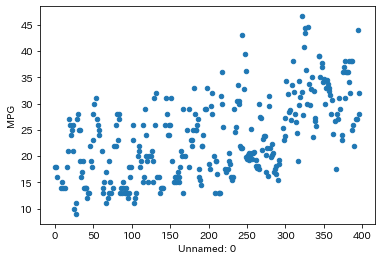

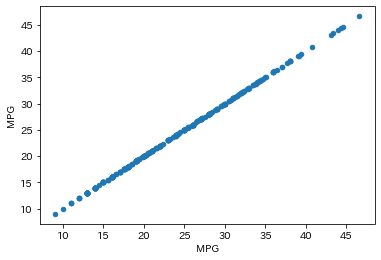

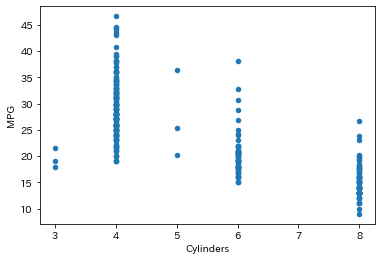

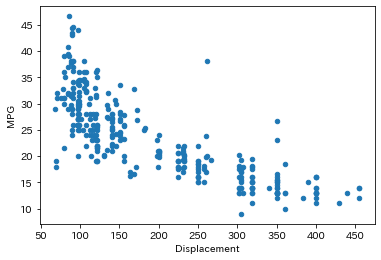

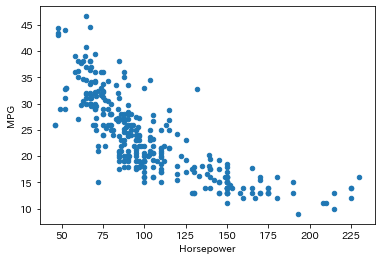

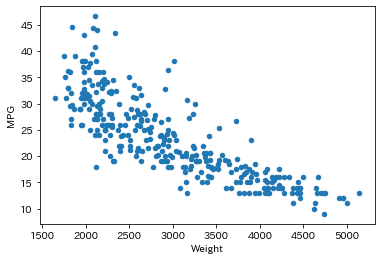

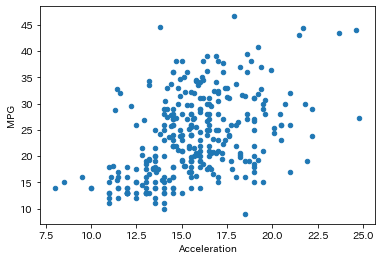

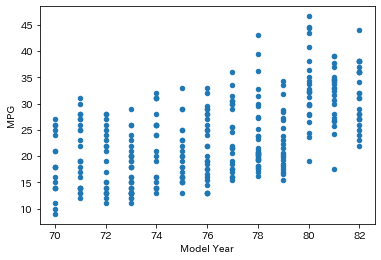

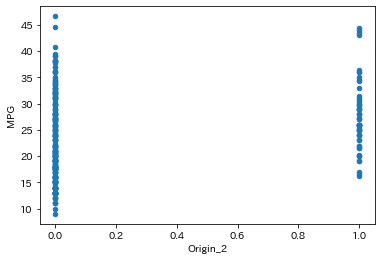

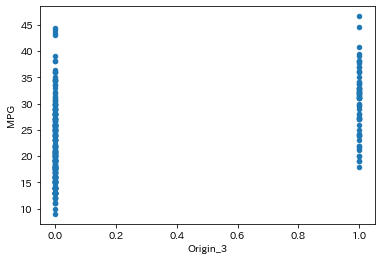

In [59]:
# 「MPG(燃費)」と「その他の項目」の相関関係を確認
colname = train_vol2.columns
for name in colname:
     train_vol2.plot(kind = 'scatter', x = name, y = 'MPG')

各列とMPGの散布図で外れ値のデータを探すと、MPG列とDisplacement列に分布傾向から外れた値があります。<br>
【外れ値の大まかな値】<br>
　MPG：40<br>
　Displacement：250

外れ値のインデックスを確認します。

In [60]:
# 「MPG」と「Displacement」の外れ値のインデックスを確認  
train_vol2[(train_vol2['MPG'] > 30) & (train_vol2['Displacement'] > 200)].index

Int64Index([387], dtype='int64')

インデックス値は387でした。<br>
dropメソッドを使って外れ値を削除します。

In [61]:
# 外れ値を削除
train_vol3 = train_vol2.drop([387], axis = 0)

外れ値を削除できたか、「外れ値の削除前」と「外れ値の削除後」の行数を表示 して確認します。

In [62]:
# 「外れ値の削除前」と「外れ値の削除後」の行数を表示 
vol2 = train_vol2.shape[0]  # 外れ値削除「前」の行数を取得  
vol3 = train_vol3.shape[0]  # 外れ値削除「後」の行数を取得
print("処理前：",vol2,"　処理後：",vol3) 

処理前： 318 　処理後： 317


１行削除済みを確認できました。

### ≪機械学習の流れ≫　４.前処理　 ③特徴量の絞り込み<br>　

２つの項目の相関関係の強さは図る指標の１つとして、相関係数があります。<br>
今回のデータは、項目数が少ないですが、正解データ（MPG）との相関係数を確認します。

In [63]:
# MPG列との相関係数を絶対値で確認
abs_cor = train_vol2.corr()['MPG'].map(abs)
# 相関係数を降順に並び替える
abs_cor.sort_values(ascending = False)

MPG             1.000000
Weight          0.823764
Displacement    0.798952
Horsepower      0.786905
Cylinders       0.766144
Unnamed: 0      0.579292
Model Year      0.573256
Acceleration    0.462807
Origin_3        0.455004
Origin_2        0.249051
Name: MPG, dtype: float64

全ての列の相関係数が0.4を超えているため、何らかの関係性があると判断しました。<br>
Cylinders列からOrigin列を特徴量とします。

### ≪機械学習の流れ≫　４.前処理　⑥特徴量と正解データに分割<br>

「④標準化～⑤多項式特徴量、交互作用特徴量の追加」は「６．評価」後に検証します。<br>
１回目の検証を行うために、特徴量と正解データを分割します。

In [64]:
# 特徴を取り出す
x = train_vol2.loc[ : , 'Cylinders':'Origin_3']

# 正解データを取り出す
t = train_vol2['MPG']

### ４.前処理 ⑦教師データの分割

訓練（訓練・検証）データを分割し、訓練データと検証データに分割します。<br>
訓練データで学習し、検証データで評価します。

In [65]:
# 訓練データと検証データに分割　8:2
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

### ≪機械学習の流れ≫　５.学習　①未学習状態のモデルの生成

特徴量が２つ以上あるため、「重回帰分析」を使用します。<br>
最小２乗法をアレンジしたラッソ回帰やリッジ回帰がありますが、今回はシンプルな最小２乗法のみを用いた重回帰モデルを使用します。

In [66]:
# LinearRegression関数をインポート
from sklearn.linear_model import LinearRegression

# 未学習モデルを生成
model = LinearRegression()

### ≪機械学習の流れ≫　５.学習　②訓練データで学習

訓練データで学習を行い、検証データで決定係数を計算します。

In [67]:
# 訓練データで学習
model.fit(x_train, y_train)

LinearRegression()

### ≪機械学習の流れ≫　６.評価　①検証データで評価し指標確認<br>　

学習したモデルを使用し、検証データで評価します。

In [68]:
# 訓練データと検証データの決定係数
s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)

print("訓練データ：{}     検証データ：{}".format(s1, s2))

訓練データ：0.8219880516063901     検証データ：0.8086313420316488


訓練データ、検証データともに80%を超えており、過学習も起きておりません。<br>

目標をテストデータで決定係数85%に設定し、「4.前処理」に戻りチューニングを行います。

### ≪機械学習の流れ≫　４.前処理 ①欠損値処理

欠損値の処理を「平均値」から「中央値」に変更し評価します。

In [69]:
#「中央値」で欠損値処理
# train_vol2 = train_vol.fillna(train_vol.median())

# 外れ値の削除
# train_vol3 = train_vol2.drop([387], axis = 0)

# 特徴を取り出す
# x = train_vol2.loc[ : , 'Cylinders':'Origin']

# 正解データを取り出す
# t = train_vol2['MPG']

# 訓練データと検証データに分割　8:2
# x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

# 未学習モデルを生成
# model = LinearRegression()

# 訓練データで学習
# model.fit(x_train, y_train)

# 訓練データと検証データの決定係数
# s1 = model.score(x_train, y_train)
# s2 = model.score(x_test, y_test)

# print("訓練データ：{}     検証データ：{}".format(s1, s2))

学習結果は、以下の通りです。
訓練データ：0.819185714353794     検証データ：0.8062014692113475

平均値と比較し、約0.01％下がりました。

平均値で進めていくため、上記コードはコメント化しておきます。

### ≪機械学習の流れ≫　４.前処理　 ⑤多項式特徴量、交互作用特徴量の追加

新しい列を作成して、特徴量に加える”特徴量エンジニアリング”を行います。<br>

元のデータ列に対して２乗した値や３乗した値の列を加える「多項式特徴量」と<br>
特徴量同士を組み合わせて新しい特徴量を加える「相互作用特徴量」を使用します。

「多項式特徴量」を加えるために、正解データと各列の相関関係を表示し、相関係数が高い項目を確認します。

In [70]:
# MPG列との相関係数を絶対値で確認
abs_cor = train_vol2.corr()['MPG'].map(abs)

# 相関係数を降順で整列
abs_cor.sort_values(ascending = False)

MPG             1.000000
Weight          0.823764
Displacement    0.798952
Horsepower      0.786905
Cylinders       0.766144
Unnamed: 0      0.579292
Model Year      0.573256
Acceleration    0.462807
Origin_3        0.455004
Origin_2        0.249051
Name: MPG, dtype: float64

MPG列と最も相関関係が高い列は「Weight」と判明しました。<br>
「Weight」や「Displacement」、「Horsepower」を2乗したデータを加えて学習します。

今後は学習繰り返すため、訓練データと検証データを決定係数を計算する関数を作成します。

In [71]:
# learn関数の定義
def learn(x,t):
  # 訓練データと検証データに分割　8:2
  x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

  model = LinearRegression()
  # 訓練データで学習 
  model.fit(x_train, y_train)
  # 訓練データの決定係数
  train_score = model.score(x_train, y_train)
  # 検証データの決定係数
  test_score = model.score(x_test, y_test)

  return train_score, test_score

In [72]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol2.loc[ : , 'Cylinders':'Origin_3']
t = train_vol2['MPG']

# チューニング（多項式）
x['Weight**2'] = x['Weight'] ** 2

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", s1, " = ", "訓練データとの差", m2 - s1)
print(m3, " - ", s2, " = ", "検証データとの差", m3 - s2)


「チューニング前」との比較
0.8572080201977221  -  0.8219880516063901  =  訓練データとの差 0.03521996859133203
0.8417409858637049  -  0.8086313420316488  =  検証データとの差 0.03310964383205617


In [73]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol2.loc[ : , 'Cylinders':'Origin_3']
t = train_vol2['MPG']

# チューニング（多項式）
x['Weight**2'] = x['Weight'] ** 2
x['Displacement**2'] = x['Displacement'] ** 2

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", s1, " = ", "訓練データとの差", m2 - s1)
print(m3, " - ", s2, " = ", "検証データとの差", m3 - s2)


「チューニング前」との比較
0.8625184272112565  -  0.8219880516063901  =  訓練データとの差 0.04053037560486639
0.8298133459421021  -  0.8086313420316488  =  検証データとの差 0.02118200391045333


In [74]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol2.loc[ : , 'Cylinders':'Origin_3']
t = train_vol2['MPG']

# チューニング（多項式）
x['Weight**2'] = x['Weight'] ** 2
x['Displacement**2'] = x['Displacement'] ** 2
x['Horsepower**2'] = x['Horsepower'] ** 2

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", s1, " = ", "訓練データとの差", m2 - s1)
print(m3, " - ", s2, " = ", "検証データとの差", m3 - s2)

「チューニング前」との比較
0.8679486880737729  -  0.8219880516063901  =  訓練データとの差 0.0459606364673828
0.8364110146858791  -  0.8086313420316488  =  検証データとの差 0.027779672654230314


続いて、「相互作用特徴量」を加えるために、各列の相関係数を確認し、相関関係が高い項目を見つけます。

In [75]:
abs_cor = train_vol2.corr()['Cylinders'].map(abs)
abs_cor.sort_values(ascending = False)

Cylinders       1.000000
Displacement    0.950317
Weight          0.892376
Horsepower      0.834949
MPG             0.766144
Acceleration    0.504479
Origin_3        0.400244
Origin_2        0.350229
Unnamed: 0      0.346003
Model Year      0.330734
Name: Cylinders, dtype: float64

In [76]:
abs_cor = train_vol2.corr()['Displacement'].map(abs)
abs_cor.sort_values(ascending = False)

Displacement    1.000000
Cylinders       0.950317
Weight          0.933113
Horsepower      0.892149
MPG             0.798952
Acceleration    0.540952
Origin_3        0.442655
Origin_2        0.371439
Unnamed: 0      0.366072
Model Year      0.348404
Name: Displacement, dtype: float64

In [77]:
abs_cor = train_vol2.corr()['Horsepower'].map(abs)
abs_cor.sort_values(ascending = False)

Horsepower      1.000000
Displacement    0.892149
Weight          0.862924
Cylinders       0.834949
MPG             0.786905
Acceleration    0.682716
Unnamed: 0      0.415323
Model Year      0.408135
Origin_3        0.333423
Origin_2        0.288774
Name: Horsepower, dtype: float64

In [78]:
abs_cor = train_vol2.corr()['Weight'].map(abs)
abs_cor.sort_values(ascending = False)

Weight          1.000000
Displacement    0.933113
Cylinders       0.892376
Horsepower      0.862924
MPG             0.823764
Origin_3        0.453397
Acceleration    0.420194
Unnamed: 0      0.303319
Model Year      0.290503
Origin_2        0.289728
Name: Weight, dtype: float64

In [79]:
abs_cor = train_vol2.corr()['Acceleration'].map(abs)
abs_cor.sort_values(ascending = False)

Acceleration    1.000000
Horsepower      0.682716
Displacement    0.540952
Cylinders       0.504479
MPG             0.462807
Weight          0.420194
Unnamed: 0      0.311091
Model Year      0.310562
Origin_2        0.215918
Origin_3        0.115070
Name: Acceleration, dtype: float64

In [80]:
abs_cor = train_vol2.corr()['Model Year'].map(abs)
abs_cor.sort_values(ascending = False)

Model Year      1.000000
Unnamed: 0      0.996612
MPG             0.573256
Horsepower      0.408135
Displacement    0.348404
Cylinders       0.330734
Acceleration    0.310562
Weight          0.290503
Origin_3        0.184759
Origin_2        0.012445
Name: Model Year, dtype: float64

上記結果より、相関関係が高いものは以下の通りとなります。<br>
<br>
Displacement列<br>
 ・Cylinders 0.950317<br>
 ・Weight 0.933113<br>
 ・Horsepower 0.893952<br>

Weight列<br>
 ・Cylinders 0.892376<br>
 ・Horsepower 0.864121<br>

In [81]:
# チューニング（特徴量エンジニアリング）

# 特徴量と正解データを取り出し
x = train_vol2.loc[ : , 'Cylinders':'Origin_3']
t = train_vol2['MPG']

# チューニング（多項式）
x['Weight**2'] = x['Weight'] ** 2
# x['Displacement**2'] = x['Displacement'] ** 2
# x['Horsepower**2'] = x['Horsepower'] ** 2

# チューニング（交互作用特徴量）
x['Dis*Cyl'] = x['Displacement'] * x['Cylinders']
x['Dis*Wei*Cyl'] = x['Displacement'] * x['Weight'] * x['Cylinders']
# x['Wei2*Dis2'] = x['Weight**2'] * x['Displacement**2']
# x['Dis*Wei'] = x['Displacement'] * x['Weight']
# x['Dis*Hor'] = x['Displacement'] * x['Horsepower']
# x['Wei*Cyl'] = x['Weight'] * x['Cylinders']


# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
m2, m3 = learn(x, t)

# チューニング前　と　訓練・検証データの差を表示
print("「チューニング前」との比較",)
print(m2, " - ", s1, " = ", "訓練データとの差", m2 - s1)
print(m3, " - ", s2, " = ", "検証データとの差", m3 - s2)


「チューニング前」との比較
0.8610672237760568  -  0.8219880516063901  =  訓練データとの差 0.03907917216966672
0.8395452595646857  -  0.8086313420316488  =  検証データとの差 0.03091391753303696


多項式特徴量を3パーン、相互作用特徴量を4パターン試しました（3乗等も行ってみました）が<br>
最も検証データの高い多項式特徴量を１つ、相互作用特徴量を２つ加えたデータで進めます。

### ≪機械学習の流れ≫　４.前処理　④標準化

各特徴量の分布において、分布を表す平均値と標準偏差が大きく異なる可能性があるため<br>
”標準化”という加工処理を行って、特徴量の平均値とばらつきを統一させます。<br>
標準化で特徴量がもつ値の重みを平等にできます。<br>

In [82]:
# 訓練データ（訓練・検証）を標準化後に再学習

from sklearn.preprocessing import StandardScaler
import numpy as np

# 特徴量を標準化
sc_model_x = StandardScaler()
sc_model_x.fit(x)
sc_x = sc_model_x.transform(x)

# 正解データを2次元に変換 ← これがないとエラー？
t = np.array(t).reshape(-1,1)

# 正解データを標準化
sc_model_t = StandardScaler()
sc_model_t.fit(t)
sc_t = sc_model_t.transform(t)

# learn関数を呼び出し（訓練・検証に分割、学習、決定係数）
sc1, sc2 = learn(sc_x, sc_t)

# チューニング前　と　訓練・検証データの差を表示
print("「標準化前」との比較",)
print(sc1, " - ", m2, " = ", "訓練データとの差", sc1 - m2)
print(sc2, " - ", m3, " = ", "検証データとの差", sc2 - m3)

「標準化前」との比較
0.8610672237760569  -  0.8610672237760568  =  訓練データとの差 1.1102230246251565e-16
0.8395452595643322  -  0.8395452595646857  =  検証データとの差 -3.5349501104064984e-13


標準化は必ず実施ではありませんが、私が調べる限り、一般的な機械学習を用いた予測モデルを作る上では、標準化は特徴量に対して適用しておいたほうが良いようです。

ですが、今回は検証データの決定係数が下がったため、標準化は行いません。

訓練データ（訓練・検証）を合わせたデータで学習させ、評価へと進みます。<br>

In [83]:
# 特徴量と正解データを取り出し
x = train_vol2.loc[ : , 'Cylinders':'Origin_3']
t = train_vol2['MPG']

# チューニング（多項式）
x['Weight**2'] = x['Weight'] ** 2

# チューニング（交互作用特徴量）
x['Dis*Cyl'] = x['Displacement'] * x['Cylinders']
x['Dis*Wei*Cyl'] = x['Displacement'] * x['Weight'] * x['Cylinders']

model = LinearRegression()
# 訓練データで学習 
model.fit(x, t)
model.score(x, t)

0.8585953648978161

### ≪機械学習の流れ≫　６.評価　①検証データで評価し指標確認<br>　

最終評価として、テストデータで決定係数を計算するために、テストデータの前処理を行います。

In [84]:
# テストデータの欠損値を平均値で穴埋め
test_vol2 = test_vol.fillna(test_vol.mean())
# 特徴量と正解データを取り出し
xf = test_vol2.loc[ : , 'Cylinders':'Origin_3']
tf = test_vol2['MPG']

# テストデータのチューニング（多項式）
xf['Weight**2'] = xf['Weight'] ** 2

# テストデータのチューニング（交互作用特徴量）
xf['Dis*Cyl'] = xf['Displacement'] * xf['Cylinders']
xf['Dis*Wei*Cyl'] = xf['Displacement'] * xf['Weight'] * xf['Cylinders']

In [85]:
# テストデータで決定係数を計算
model.score(xf, tf)

0.8645526359091451

## 目標の決定係数85%を超えることができました！！！

今回の学習結果では、過学習もなく、正解データと各特徴量の相関係数も0.4を超えているため<br>
不要な特徴量も少ないと判断しましたが、「リッジ回帰」と「ラッソ回帰」も実施してみます。

In [86]:
from sklearn.linear_model import Ridge

max_s = 0
mas_i = 0

for i in range(1, 2001):
    num = i/100
    r_model = Ridge(random_state=0, alpha = num)
    r_model.fit(x,t)

    result = r_model.score(xf, tf)
    if result > max_s:
        max_s = result
        mas_i = num

print("正則化項の定数:{}　　決定係数：{}".format(mas_i, max_s))

正則化項の定数:1.21　　決定係数：0.8645724470001339


## リッジ回帰では、決定係数86.45%になりました。

In [87]:
from sklearn.linear_model import Lasso

trial = 100

max_ss = 0
mas_ii = 0

for i in range(trial):
      
    rs_model = Lasso(max_iter=100000, tol=1e-10)
    rs_model.fit(x, t)

    result = rs_model.score(xf, tf)
    if result > max_s:
        max_s = result
        mas_i = num

print("正則化項の定数:{}　　決定係数：{}".format(mas_i, max_s))

正則化項の定数:20.0　　決定係数：0.8701723624789077


## ロッソ回帰では、決定係数87.01%になりました！！！

機械学習は、様々な回帰モデルがあるため、決定係数を上げるためには根気強く確認することが重要です。

### モデルを保存して、機械学習が終了です

In [88]:
# pickleのインポート
import pickle

# モデルを保存
with open('automgp_model.pkl', 'wb') as f:
    pickle.dump(rs_model, f)